In [1]:
import keras
from keras.models import load_model
from numpy import *
import numpy as np

import pandas as pd
from pylab import *

In [2]:
# Load in all the best pre-trained models

thps = load_model('models/thps1_val-loss_0.0.keras')

thp = load_model('models/thp1_val-loss_21.2.keras')

ths = load_model('models/ths1_val-loss_9.3.keras')

tps = load_model('models/tps1_val-loss_2.5.keras')

hps = load_model('models/hps1_val-loss_0.9.keras')

In [3]:

# The full set of training + test data
df = pd.read_csv('ontariostations_2000_to_2023_t_h_s_p_fwi.csv')

all_features = df[['MEAN_TEMPERATURE','MAX_REL_HUMIDITY','TOTAL_PRECIPITATION','SPEED_MAX_GUST']].to_numpy()
all_labels = df.fwi.values

In [4]:
#Set up colours scale for plotting
colors = ones((3,len(all_labels)))


colors[0] = all_labels/20# (max(all_labels)/5)  # there happens to be a veyr large value that makes this not work nicely
colors[1] = colors[1]-all_labels/20 # (max(all_labels)/5)
colors[np.where(colors >1)] = 1
colors[np.where(colors <0)] = 0
colors=colors.T

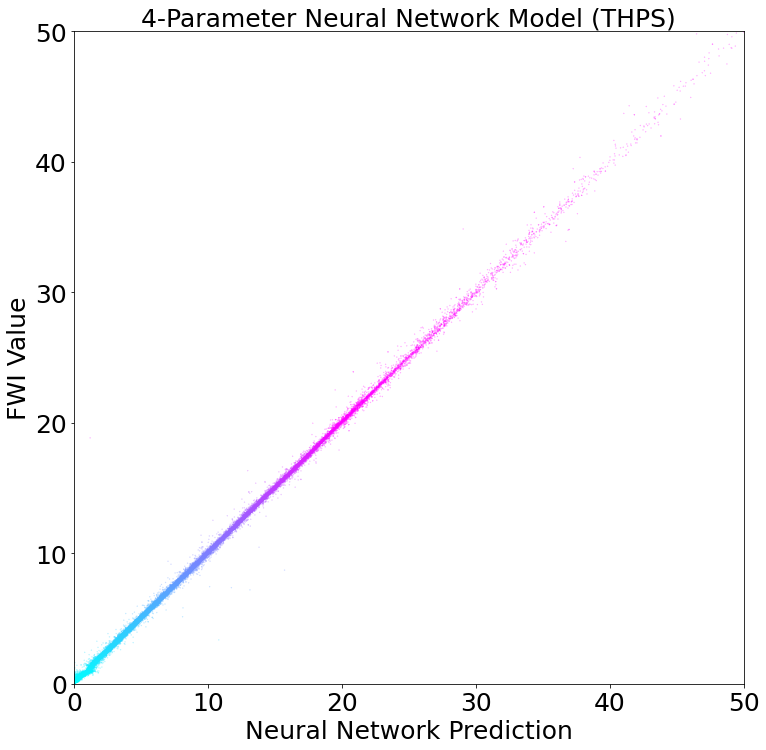

In [5]:
   
thps_predictions = thps.predict(all_features.reshape(-1,4))
    
figure(figsize = (12,12))
scatter(thps_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
title("4-Parameter Neural Network Model (THPS)",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)

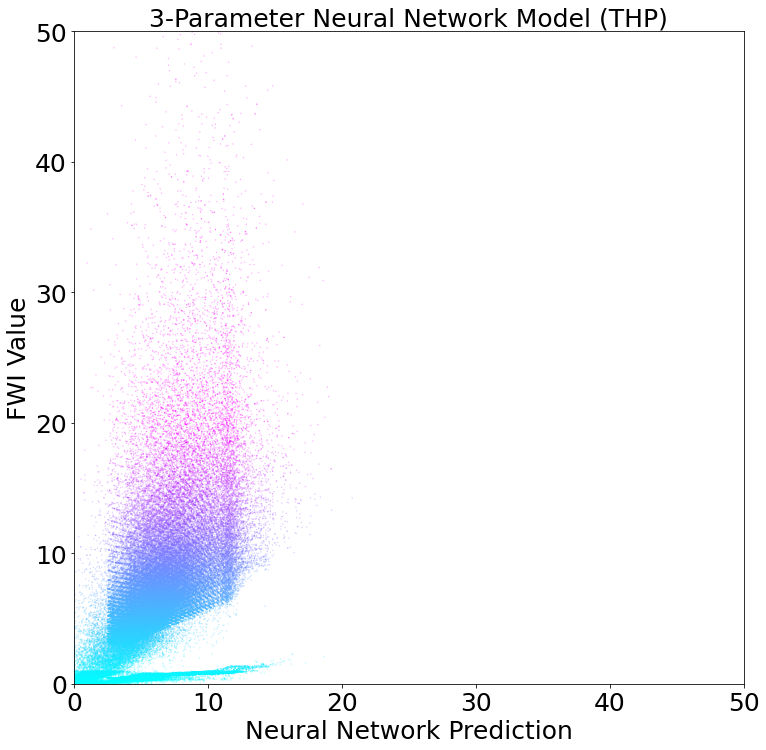

In [6]:
# Predict on temperature, humidity, and precipitation only
thp_predictions = thp.predict(all_features[:,:3].reshape(-1,3))
    
figure(figsize = (12,12))
scatter(thp_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
title("3-Parameter Neural Network Model (THP)",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)

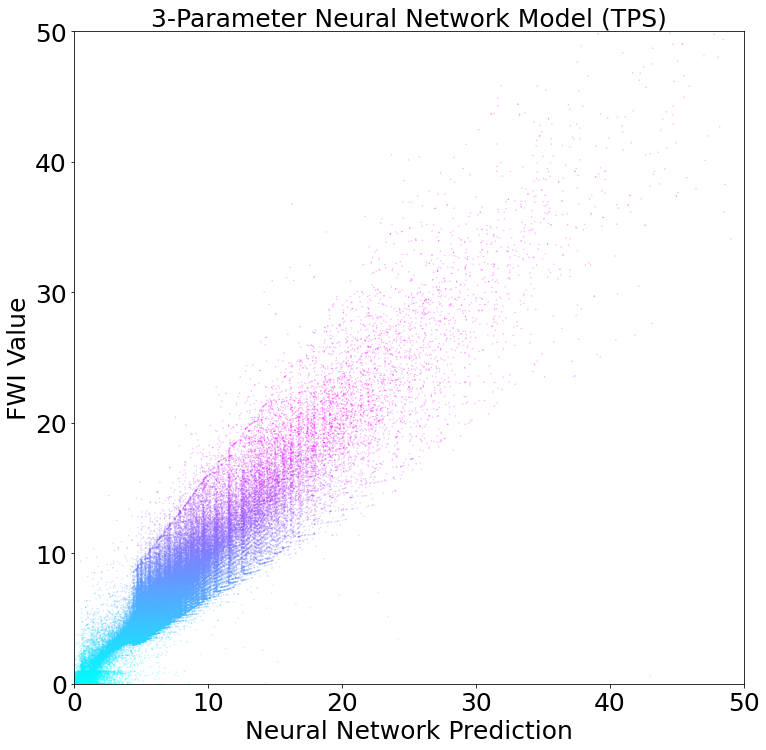

In [7]:
# Predict on temperature, precipitation, and wind speed only
tps_predictions = tps.predict(all_features[:,[0,2,3]].reshape(-1,3))
    
figure(figsize = (12,12))
scatter(tps_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
title("3-Parameter Neural Network Model (TPS)",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)

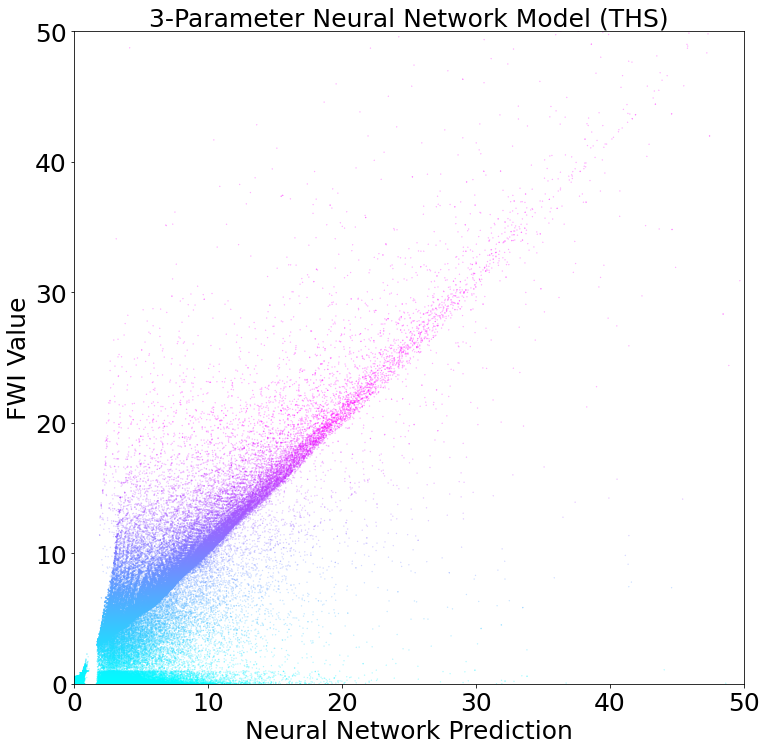

In [8]:
# Predict on temperature, humidity, and wind speed only
ths_predictions = ths.predict(all_features[:,[0,1,3]].reshape(-1,3))
    
figure(figsize = (12,12))
scatter(ths_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
title("3-Parameter Neural Network Model (THS)",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)

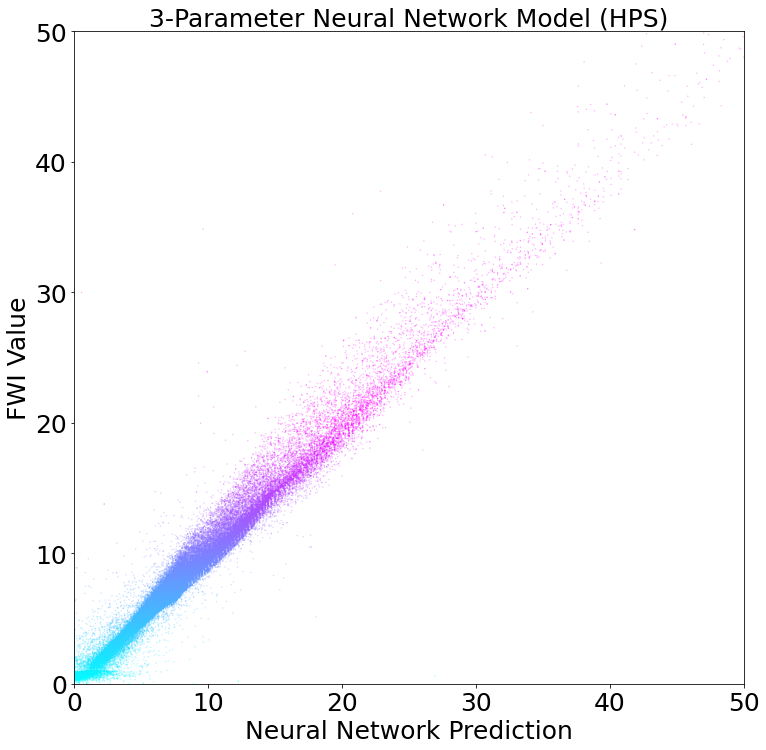

In [9]:
# Predict on precipittion, humidity, and wind speed only
hps_predictions = hps.predict(all_features[:,1:].reshape(-1,3))
    
figure(figsize = (12,12))
scatter(hps_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
title("3-Parameter Neural Network Model (HPS)",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)

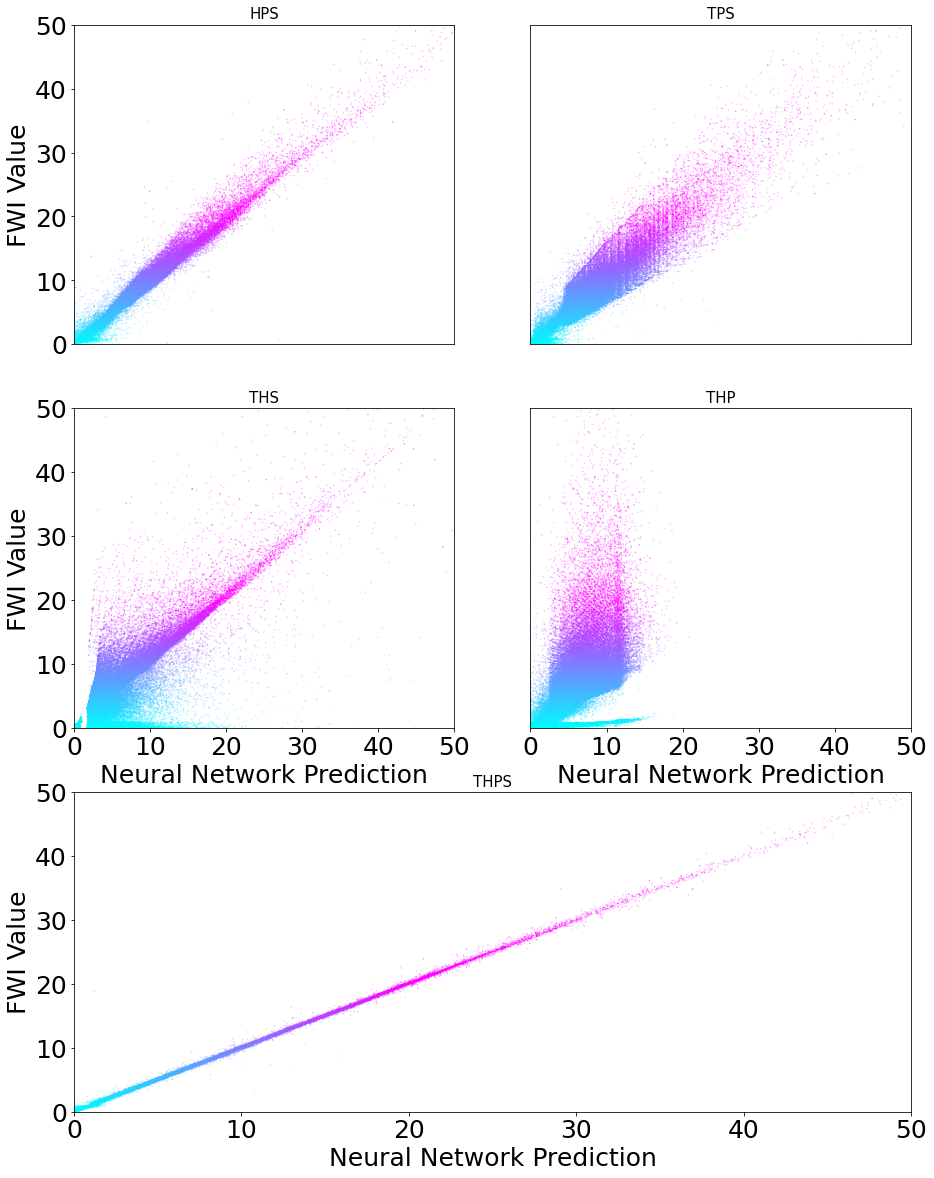

In [57]:
#Set up colours scale for plotting   - scale colors with label value?
colors = ones((3,len(all_labels)))


colors[0] = all_labels/20# (max(all_labels)/5)  # there happens to be a veyr large value that makes this not work nicely
colors[1] = colors[1]-all_labels/20 # (max(all_labels)/5)
colors[np.where(colors >1)] = 1
colors[np.where(colors <0)] = 0
colors=colors.T






figure(figsize = (15,20))

subplot(3,2,1)
scatter(hps_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
title('HPS',fontsize = 15)
xlim(0,50)
ylim(0,50)
#xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
_=xticks([],fontsize = 25)
_=yticks(fontsize = 25)

subplot(3,2,2)
scatter(tps_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
#xlabel("Neural Network Prediction",fontsize = 25)
#ylabel("FWI Value",fontsize = 25)
_=xticks([],fontsize = 25)
_=yticks([],fontsize = 25)
title('TPS',fontsize = 15)

subplot(3,2,3)
scatter(ths_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)
title('THS',fontsize = 15)


subplot(3,2,4)
scatter(thp_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
#ylabel("FWI Value",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks([],fontsize = 25)
title('THP',fontsize = 15)



subplot(3,1,3)
scatter(thps_predictions,all_labels,color = colors,marker = '.',alpha = 0.5,s = 0.3)
title('THPS',fontsize = 15)

xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)



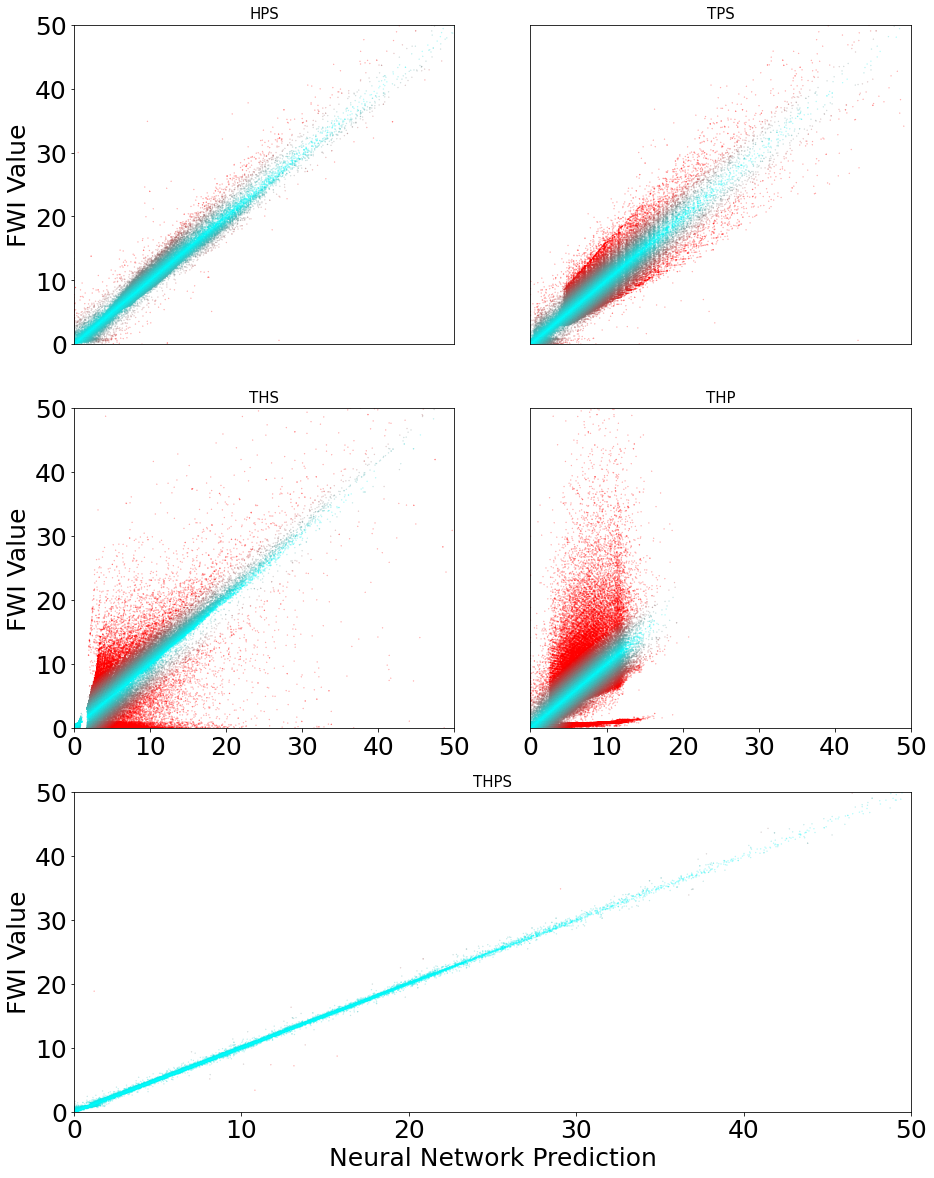

In [58]:
def getColors(PRED,errtol = 5):
    PRED = PRED.reshape(-1)
    #Set up colours scale for plotting
    colors = ones((3,len(all_labels)))

    colors[1] = 1-abs(all_labels-PRED)/errtol# (max(all_labels)/5)  # there happens to be a veyr large value that makes this not work nicely
    colors[2] = 1-abs(all_labels-PRED)/errtol # (max(all_labels)/5)
    colors[0] = abs(all_labels-PRED)/errtol
    colors[np.where(colors >1)] = 1
    colors[np.where(colors <0)] = 0
    colors=colors.T
    return colors


figure(figsize = (15,20))

subplot(3,2,1)
scatter(hps_predictions,all_labels,color = getColors(hps_predictions),marker = '.',alpha = 0.5,s = 0.3)
title('HPS',fontsize = 15)
xlim(0,50)
ylim(0,50)
#xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
_=xticks([],fontsize = 25)
_=yticks(fontsize = 25)

subplot(3,2,2)
scatter(tps_predictions,all_labels,color = getColors(tps_predictions),marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
#xlabel("Neural Network Prediction",fontsize = 25)
#ylabel("FWI Value",fontsize = 25)
_=xticks([],fontsize = 25)
_=yticks([],fontsize = 25)
title('TPS',fontsize = 15)

subplot(3,2,3)
scatter(ths_predictions,all_labels,color = getColors(ths_predictions),marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
#xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)
title('THS',fontsize = 15)


subplot(3,2,4)
scatter(thp_predictions,all_labels,color = getColors(thp_predictions),marker = '.',alpha = 0.5,s = 0.3)
xlim(0,50)
ylim(0,50)
#xlabel("Neural Network Prediction",fontsize = 25)
#ylabel("FWI Value",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks([],fontsize = 25)
title('THP',fontsize = 15)



subplot(3,1,3)
scatter(thps_predictions,all_labels,color = getColors(thps_predictions),marker = '.',alpha = 0.5,s = 0.3)
title('THPS',fontsize = 15)
xlim(0,50)
ylim(0,50)
xlabel("Neural Network Prediction",fontsize = 25)
ylabel("FWI Value",fontsize = 25)
_=xticks(fontsize = 25)
_=yticks(fontsize = 25)

